In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nest
import numpy as np
import os
import sys 

sys.path.append("..")

from pynestml.frontend.pynestml_frontend import generate_nest_target

NEST_SIMULATOR_INSTALL_LOCATION = nest.ll_api.sli_func("statusdict/prefix ::")


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.5
 Built: Sep 20 2023 22:10:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
neuron_model = [
    "izhikevich.nestml",
    "iaf_psc_exp.nestml",
    "edlif_psc_exp_percent_copy.nestml",
    "edlif_psc_exp_percent.nestml", 
    "edlif_psc_base.nestml", 
    "edlif_psc_nonlineardendrite.nestml",
    "edlif_psc_supply_state.nestml",
    "edlif_psc_supply_inline.nestml",
    "edlif_psc_percent.nestml",
]
neuron_id = 2


In [3]:
model_created = 0
if not model_created:
    generate_nest_target(input_path=f"../models/{neuron_model[neuron_id]}",
                     target_path="/tmp/nestml-component",
                     logging_level="INFO",
                     codegen_opts={"nest_path": NEST_SIMULATOR_INSTALL_LOCATION})

[1,GLOBAL, INFO]: List of files that will be processed:
[2,GLOBAL, INFO]: /opt/data/edlif/notebooks/../models/edlif_psc_exp_percent_copy.nestml
[3,GLOBAL, INFO]: Creating target directory: '/tmp/nestml-component'
[4,GLOBAL, INFO]: No module name specified; the generated module will be named "nestmlmodule"

              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.5
 Built: Sep 20 2023 22:10:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

[5,GLOBAL, INFO]: The NEST Simulator version was automatically detected as: v3.5
[6,GLOBAL, INFO]: Given template root path is not an absolute path. Creating the absolute path with default templates directory '/usr/local/lib/python3.10/dist-packages/pynestml/codegeneration/resources_nest/point_neuron'
[7,GLOBAL, INFO]: Given template root path is not an absolute 

INFO:root:Analysing input:
INFO:root:{
    "dynamics": [
        {
            "expression": "V_abs' = (-V_abs) / tau_m + ((1.0 * I_kernel_ex__X__exc_spikes - 1.0 * I_kernel_in__X__inh_spikes) + I_e + I_stim) / C_m",
            "initial_values": {
                "V_abs": "0"
            }
        },
        {
            "expression": "ATP' = (((ATP_h - ATP) * K_ATP * homeostatic_s_enabled + ATP_basal) - ((ATP_basal + (E_ap_tr * E_ap / tau_ap / o_t) + ((ATP_kernel_ex__X__exc_spikes * E_syn_ex / tau_syn_atp_ex / w_max + ATP_kernel_in__X__inh_spikes * E_syn_in / tau_syn_atp_in / w_min) / o_t / 1.0)))) * o_t * (1 - fix_atp)",
            "initial_values": {
                "ATP": "100"
            }
        },
        {
            "expression": "ATP_kernel_ex__X__exc_spikes = exp(-t / tau_syn_atp_ex)",
            "initial_values": {}
        },
        {
            "expression": "ATP_kernel_in__X__inh_spikes = exp(-t / tau_syn_atp_in)",
            "initial_values": {}
        },
   

[55,edlif_psc_exp_percent, INFO, [24:15;24:15]]: Implicit casting from (compatible) type 'integer' to 'real'.
[56,edlif_psc_exp_percent, INFO, [25:15;25:15]]: Implicit casting from (compatible) type 'integer' to 'real'.
[57,edlif_psc_exp_percent, INFO, [47:4;50:4]]: Implicit casting from (compatible) type '1 / pA' to 'real'.
[58,edlif_psc_exp_percent, WARNING, [47:4;50:4]]: Implicit casting from (compatible) type '1 / pA' to 'real'.
[59,edlif_psc_exp_percent, INFO, [47:4;50:4]]: Implicit casting from (compatible) type '1 / pA' to 'real'.
[60,edlif_psc_exp_percent, INFO, [69:17;69:17]]: Implicit casting from (compatible) type 'integer' to 'real'.
[61,edlif_psc_exp_percent, INFO, [74:17;74:17]]: Implicit casting from (compatible) type 'integer' to 'real'.
[62,edlif_psc_exp_percent, INFO, [75:16;75:16]]: Implicit casting from (compatible) type 'integer' to 'real'.
[63,edlif_psc_exp_percent, INFO, [76:16;76:16]]: Implicit casting from (compatible) type 'integer' to 'real'.
[64,edlif_psc_ex

In [4]:
nest.Install("nestmlmodule")

edlif_psc_exp_percent::init_state_internal_()

Apr 15 06:29:48 Install [Info]: 
    loaded module nestmlmodule


In [5]:
neuron_model_name = neuron_model[neuron_id].split(".")[0]
print(f"Using neuron model: {neuron_model_name}")

Using neuron model: edlif_psc_exp_percent_copy


In [6]:
neuron = nest.Create("edlif_psc_exp_percent")

In [7]:
# current generator
gen = "ac" # dc o ac
print(f"Using {gen} current generator")


voltmeter = nest.Create("voltmeter")


Using ac current generator


In [8]:
voltmeter.set({"record_from": ["V_m", "ATP", "ATP_c", "ATP_s", "E_ap_tr", "E_ap_c"]}) #, "E_ap_der", "E_ap_tr2"]})
nest.Connect(voltmeter, neuron)

if gen == "dc":
    cgs = nest.Create('dc_generator')
    cgs.set({"amplitude": 1.86})
elif gen == "ac":
    cgs = nest.Create('ac_generator')
    cgs.set({"amplitude": 300.2})
    cgs.set({"offset": 700.2})
    cgs.set({"frequency": 4})
    

In [9]:
nest.Connect(cgs, neuron)
#neuron.I_e = 2000

In [10]:
sr = nest.Create("spike_recorder")
nest.Connect(neuron, sr)

In [11]:
nest.Simulate(500.)

edlif_psc_exp_percent::init_buffers_()

Apr 15 06:29:49 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Apr 15 06:29:49 MUSICManager::enter_runtime [Info]: 
    Entering MUSIC runtime with tick = 1 ms

Apr 15 06:29:49 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 500
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Apr 15 06:29:49 SimulationManager::run [Info]: 
    Simulation finished.


In [12]:
# precision
#error = nest.GetStatus(neuron, "gsl_error_tol")
#print(f"absolute error of integration: {error}")

spike_times = nest.GetStatus(sr, keys='events')[0]['times']

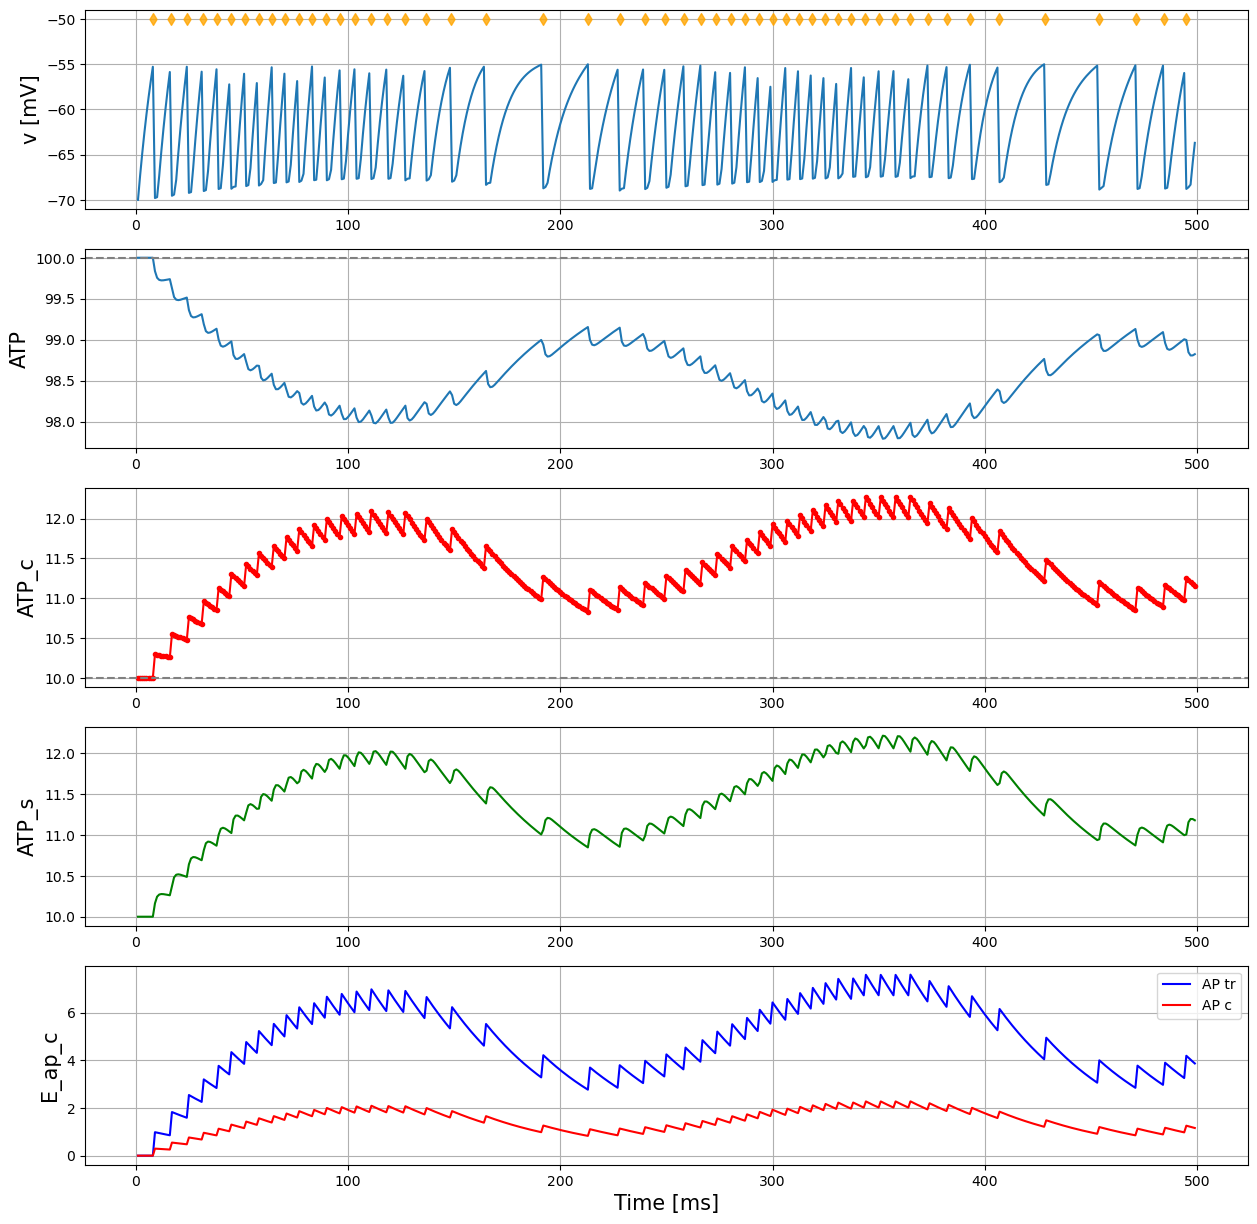

In [13]:
fontsize = 15
fig, ax = plt.subplots(nrows=5, figsize=(15,15))
ax[0].plot(voltmeter.get("events")["times"], voltmeter.get("events")["V_m"])
ax[1].plot(voltmeter.get("events")["times"], voltmeter.get("events")["ATP"])
ax[1].axhline(y=neuron.get("ATP_h"), c="gray", ls="--")
ax[2].plot(voltmeter.get("events")["times"], voltmeter.get("events")["ATP_c"], c="r", marker ='.')
ax[2].axhline(y=neuron.get("ATP_basal"), c="gray", ls="--")
ax[3].plot(voltmeter.get("events")["times"], voltmeter.get("events")["ATP_s"], c="g")
ax[4].plot(voltmeter.get("events")["times"], voltmeter.get("events")["E_ap_tr"], c="b", label="AP tr")
ax[4].plot(voltmeter.get("events")["times"], voltmeter.get("events")["E_ap_c"], c="r", label="AP c")
#ax[5].plot(voltmeter.get("events")["times"], voltmeter.get("events")["E_ap_tr2"], c="b")
#ax[5].plot(voltmeter.get("events")["times"], voltmeter.get("events")["E_ap_der"], c="r")
ax[0].scatter(spike_times, -50 * np.ones_like(spike_times), marker="d", c="orange", alpha=.8, zorder=99)
for _ax in ax:
    _ax.grid(True)
ax[0].set_ylabel("v [mV]", fontsize=fontsize)
ax[1].set_ylabel("ATP", fontsize=fontsize)
ax[2].set_ylabel("ATP_c", fontsize=fontsize)
ax[3].set_ylabel("ATP_s", fontsize=fontsize)
ax[4].set_ylabel("E_ap_tr", fontsize=fontsize)
ax[4].set_ylabel("E_ap_c", fontsize=fontsize)
ax[-1].set_xlabel("Time [ms]", fontsize=fontsize)
ax[4].legend()
fig.show()